In [2]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
faces = fetch_lfw_people(min_faces_per_person=50) # requires internet connection to download data for the first time

In [3]:
faces.images

array([[[ 81.333336,  86.      , 102.      , ...,  57.      ,
          69.      ,  77.      ],
        [ 86.666664,  90.      , 102.      , ...,  43.666668,
          58.333332,  76.333336],
        [ 92.      ,  96.      ,  94.333336, ...,  46.      ,
          49.      ,  63.333332],
        ...,
        [ 47.666668,  47.      ,  45.      , ..., 163.33333 ,
         115.333336,  85.      ],
        [ 48.      ,  48.333332,  46.333332, ..., 146.66667 ,
         137.      , 102.666664],
        [ 47.666668,  47.333332,  46.      , ..., 134.      ,
         149.66667 , 120.      ]],

       [[ 33.333332,  58.      ,  80.      , ...,  48.      ,
          44.      ,  40.666668],
        [ 40.      ,  67.666664,  85.      , ...,  58.333332,
          53.333332,  48.333332],
        [ 46.      ,  73.333336,  86.666664, ...,  68.      ,
          60.333332,  54.333332],
        ...,
        [ 10.      ,  33.      , 105.333336, ..., 188.33333 ,
         182.      , 178.      ],
        [  9

In [4]:
faces.data.shape

(1560, 2914)

In [5]:
faces.images[0].shape

(62, 47)

In [6]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [7]:
faces.target_names.size

12

In [8]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [9]:
faces.target_names[4]

'Gerhard Schroeder'

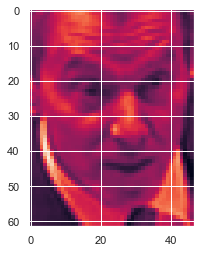

In [10]:
plt.imshow(faces.images[0])

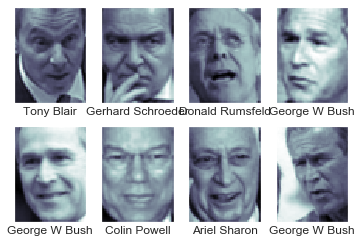

In [11]:
fig , ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [13]:
pcaModel = PCA(n_components=150,whiten=True)
svmModel = SVC(kernel='rbf',class_weight='balanced')
mdl = make_pipeline(pcaModel,svmModel)

In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,test_size=0.2)

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid = GridSearchCV(mdl,param_grid)

In [16]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            r

In [17]:
print(grid.best_params_)

{'svc__C': 30, 'svc__gamma': 0.005}


In [18]:
mdl = grid.best_estimator_

In [19]:
y_pred = mdl.predict(Xtest)

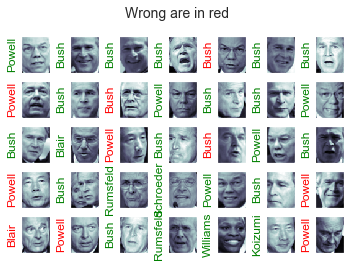

In [32]:
fig,ax = plt.subplots(5,7)
for idx , axidx in enumerate(ax.flat):
    axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
    #plt.figure(figsize=(15,15))
    fig.suptitle('Wrong are in red',size=14)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.82        13
     Colin Powell       0.70      0.93      0.80        54
  Donald Rumsfeld       0.79      0.61      0.69        18
    George W Bush       0.82      0.94      0.87       119
Gerhard Schroeder       0.76      0.76      0.76        17
      Hugo Chavez       1.00      0.50      0.67        14
   Jacques Chirac       0.75      0.38      0.50         8
    Jean Chretien       1.00      0.50      0.67         6
    John Ashcroft       0.86      0.67      0.75         9
Junichiro Koizumi       0.88      0.64      0.74        11
  Serena Williams       1.00      0.64      0.78        14
       Tony Blair       0.81      0.72      0.76        29

         accuracy                           0.80       312
        macro avg       0.86      0.67      0.73       312
     weighted avg       0.82      0.80      0.80       312



Text(89.18, 0.5, 'predicted label')

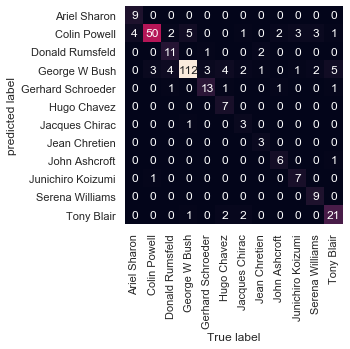

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("predicted label")